<a href="https://colab.research.google.com/github/zoekabob/lab-3-phase-2-sfwathen/blob/main/Copy_of_DATA_301_Lab_3_Zoe_Atkins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv.
- The codebook (explaining what the variables mean) is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/codebook.csv.

In [2]:
import pandas as pd

df = pd.read_csv('https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv')
df

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,PR.1,PR.2,MCS.1,Scorer.1,MCS.2,Scorer.2,MCS.avg,R1CS.1,Scorer.1.1,R1CS.2,Scorer.2.1,R1CS.avg,R2CS.1,Scorer.1.2,R2CS.2,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,1.0,0.80,0.750,NK,0.670,TT,0.7100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.400,NK,0.367,TT,0.3835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.433,NK,0.550,MS,0.4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.317,NK,0.333,MS,0.3250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,0.0,0.95,0.683,NK,0.717,MS,0.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1
5,KB6,19,Male,11/22/16,11/29/16,Concept,1,1,1,1,1.0,0.60,0.817,NK,0.783,MS,0.8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NK,0.46,MS,0.43,0,0,1
6,KB7,18,Male,11/22/16,12/6/16,Concept,1,1,1,1,1.0,0.60,0.733,NK,0.767,MS,0.7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38,MS,0.36,CB,0.37,0,0,1
7,KB8,20,Male,11/22/16,11/29/16,Concept,1,1,1,1,1.0,0.50,0.350,NK,0.333,MS,0.3415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44,NK,0.46,MS,0.45,0,0,1
8,KB9,20,Male,11/22/16,11/28/16,Concept,1,1,1,1,0.0,0.60,0.650,NK,0.650,MS,0.6500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.64,MS,0.58,NK,0.61,0,0,1
9,KB10,20,Female,11/29/16,12/6/16,Concept,1,1,1,1,1.0,0.90,0.817,NK,0.783,MS,0.8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.66,NK,0.70,MS,0.68,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later.

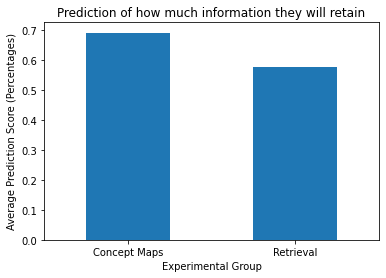

In [18]:
# df_small = df[['Condition', 'PR.2']]
expanded_df = pd.get_dummies(df[['Condition', 'PR.2']])
expanded_df['Concept'] = (expanded_df['PR.2']*expanded_df['Condition_Concept'])
expanded_df['Retrieval'] = expanded_df['PR.2']*expanded_df['Condition_Retrieval']

expanded_df = expanded_df.replace(0, np.NaN)

conceptMean = expanded_df['Concept'].mean()
retrievalMean = expanded_df['Retrieval'].mean()
# print('Those who drew concept maps thought they would get %.2f' %conceptMean,'.')
# print('Those who practiced retrieval thought they would get %.2f' %retrievalMean,'.')

df1 = pd.DataFrame({'Percentage': [conceptMean, retrievalMean]}, 
                   index=['Concept Maps', 'Retrieval'])
# x= df1.plot.title()
ax = df1.plot.bar(rot=0, legend=False)
ax.set_title('Prediction of how much information they will retain')
ax.set_xlabel('Experimental Group')
ax.set_ylabel('Average Prediction Scores (Percentages)')
ax


It looks like people who used Concept Maps felt they had a better grasp on the information than those who just practiced Retrieval methods. This could be because they had to have a deeper understanding of the information to draw a concept map.

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

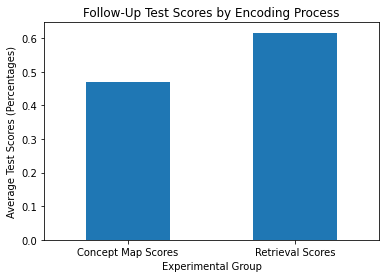

In [19]:
scoresdf = pd.get_dummies(df[['Condition','TS.avg']])
scoresdf
import numpy as np



# i=0
# for x in conceptAvgScores:
#   if x>0:
#     i+=1
# j=0
# for x in retrievalAvgScores:
#   if x>0:
#     j+=1

concept_df = scoresdf[(scoresdf["Condition_Concept"] == 1)]
ret_df = scoresdf[(scoresdf["Condition_Retrieval"] == 1)]

conceptAvgScores = (concept_df['TS.avg']*concept_df['Condition_Concept']).mean()
retrievalAvgScores = (ret_df['TS.avg']*ret_df['Condition_Retrieval']).mean()

# conceptAvgTestScore = conceptAvgScores.sum()/i
# retrievalAvgTestScore = retrievalAvgScores.sum()/j

df1 = pd.DataFrame({'Score': [conceptAvgScores, retrievalAvgScores]}, 
                   index=['Concept Map Scores', 'Retrieval Scores'])
# x= df1.plot.title()
ax = df1.plot.bar(rot=0, legend=False)
ax.set_title('Follow-Up Test Scores by Encoding Process')
ax.set_xlabel('Experimental Group')
ax.set_ylabel('Average Test Scores (Percentages)')
ax

It looks like those who practiced retrieval while learning the material scored higher on the follow up on average. 

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances


df_con = df[df["Condition"] == 'Concept']

con_diff = (df_con['TS.avg'] - df_con['PR.2']).abs()

concept_diff = con_diff.mean()

df_ret = df[df["Condition"] == 'Retrieval']

ret_diff = (df_ret['TS.avg'] - df_ret['PR.2']).abs()

retrieval_diff = ret_diff.mean()

print(concept_diff, retrieval_diff)


0.2753846153846154 0.19176470588235295


In [5]:
# prediction_actual_df = df[['PR.2', 'Condition','TS.avg']]
# prediction_actual_df['Difference'] = prediction_actual_df['TS.avg'] - prediction_actual_df['PR.2']
# df2 = pd.get_dummies(prediction_actual_df)

# concept_diff = (df2['Difference']*df2['Condition_Concept']).mean()
# retrieval_diff = (df2['Difference']*df2['Condition_Retrieval']).mean()

# print(concept_diff) #negative means they scored lower than predicted
# print(retrieval_diff)

-0.133953488372093
0.015813953488372095


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The retrieval students were better at guessing what their scores would be on the second test by around 8 points. On average, retrieval students were off by about 19.6% whereas concept students were off by an impressive 27.5%. Given the graphs shown above, this is likely because concept students overestimated their performance on the second test considerably. This outweighed how much the retrieval student underestimated their performance.


## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 3 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partner for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.